In [1]:
%matplotlib inline
import geopandas as gpd
import numpy as np
from scipy import ndimage

import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import shapefile as shp  # Requires the pyshp package
import matplotlib.pyplot as plt
import codecs
import sys
import numpy
import pandas as pd

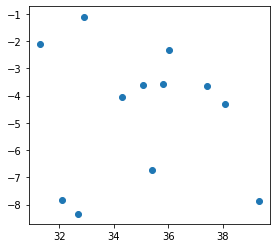

In [5]:
pts = gpd.GeoDataFrame.from_file('glwd_1.shp')
tza = pts[pts['COUNTRY'] == 'Tanzania']


env = tza['geometry']
envgdf = gpd.GeoDataFrame(gpd.GeoSeries(env))
envgdf = envgdf.rename(columns={0:'geometry'}).set_geometry('geometry')
envgdf['centroid'] = envgdf.centroid
centroid = envgdf.set_geometry('centroid')
centroid.plot();

In [48]:
centroid = pd.DataFrame(centroid['centroid'])
s = centroid['centroid']
x = s.apply(lambda p: p.x)
x = x.values
# s.apply(lambda p: p.y)

In [49]:
y = s.apply(lambda p: p.y)
y = y.values

In [121]:
from shapely.geometry import MultiPoint
points2 = envgdf.copy()
points2.geometry = points2.geometry.apply(lambda x: MultiPoint(list(x.exterior.coords)))
lake_victoria = points2.iloc[0]['geometry']
victoria = [(pt.x, pt.y) for pt in lake_victoria]
vic = pd.DataFrame(victoria)
vic = vic.round(decimals=0)
a = vic.values

rukwa = points2.iloc[1]['geometry']
rukwa_points = [(pt.x, pt.y) for pt in rukwa]
ruk = pd.DataFrame(rukwa_points)
ruk = ruk.round(decimals=0)
b = ruk.values

eyasi = points2.iloc[2]['geometry']
eyasi_points = [(pt.x, pt.y) for pt in eyasi]
eya = pd.DataFrame(eyasi_points)
eya = eya.round(decimals=0)
c = eya.values

ind259 = points2.iloc[3]['geometry']
ind259 = [(pt.x, pt.y) for pt in ind259]
ind259 = pd.DataFrame(ind259)
ind259 = ind259.round(decimals=0)
d = ind259.values

natron = points2.iloc[4]['geometry']
natron = [(pt.x, pt.y) for pt in natron]
natron = pd.DataFrame(natron)
natron = natron.round(decimals=0)
e = natron.values

manyara = points2.iloc[5]['geometry']
manyara = [(pt.x, pt.y) for pt in manyara]
manyara = pd.DataFrame(manyara)
manyara = manyara.round(decimals=0)
f = manyara.values

ind773 = points2.iloc[6]['geometry']
ind773 = [(pt.x, pt.y) for pt in ind773]
ind773 = pd.DataFrame(ind773)
ind773 = ind773.round(decimals=0)
g = ind773.values

ikuletwa = points2.iloc[7]['geometry']
ikuletwa = [(pt.x, pt.y) for pt in ikuletwa]
ikuletwa = pd.DataFrame(ikuletwa)
ikuletwa = ikuletwa.round(decimals=0)
h = ikuletwa.values

kitangiri = points2.iloc[8]['geometry']
kitangiri = [(pt.x, pt.y) for pt in kitangiri]
kitangiri = pd.DataFrame(kitangiri)
kitangiri = kitangiri.round(decimals=0)
i = kitangiri.values

burigi = points2.iloc[9]['geometry']
burigi = [(pt.x, pt.y) for pt in burigi]
burigi = pd.DataFrame(burigi)
burigi = burigi.round(decimals=0)
k = burigi.values

top9water = np.concatenate((a,b,c,d,e,f,g,h,i,k), axis = 0)

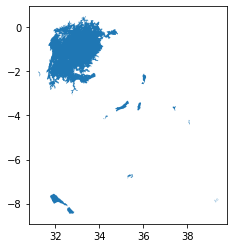

In [6]:
tza.plot()

In [132]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Merge train_features.csv & train_labels.csv
train = pd.merge(pd.read_csv('https://drive.google.com/uc?export=download&id=14ULvX0uOgftTB2s97uS8lIx1nHGQIB0P'), 
                 pd.read_csv('https://drive.google.com/uc?export=download&id=1r441wLr7gKGHGLyPpKauvCuUOU556S2f'))

pop1 = pd.read_csv('tza_pop_adm1.csv')
pop2 = pd.read_csv('tza_pop_adm2.csv')
pop3 = pd.read_csv('tza_pop_adm3.csv')

trainwithpopulation1 = pd.merge(train, pop1, how='outer', left_on = 'region', right_on = 'ADM1_EN')
train = trainwithpopulation1.iloc[0:59400]

# Read test_features.csv & sample_submission.csv
test = pd.read_csv('https://drive.google.com/uc?export=download&id=1wvsYl9hbRbZuIuoaLWCsW_kbcxCdocHz')
sample_submission = pd.read_csv('https://drive.google.com/uc?export=download&id=1kfJewnmhowpUo381oSn3XqsQ6Eto23XV')

testwithpopulation1 = pd.merge(test, pop1, how='outer', left_on = 'region', right_on = 'ADM1_EN')
test = trainwithpopulation1.iloc[0:14358]

# Split train into train & val
train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train['status_group'], random_state=42)

# Print dataframe shapes
print('train', train.shape)
print('val', val.shape)
print('test', test.shape)

train (47520, 55)
val (11880, 55)
test (14358, 55)


In [125]:
train = train.round(decimals = 0)
val = val.round(decimals = 0)
test = test.round(decimals = 0)

In [69]:
train['source'].unique

<bound method Series.unique of 43314                  spring
5058                   spring
1682                   spring
620                    spring
52381                   river
6441              machine dbh
1742                   spring
54651            shallow well
26737                   river
44236             machine dbh
29747                  spring
6544                     lake
29122                  spring
4479                   spring
57562                   river
955                    spring
1395                   spring
59024             machine dbh
41639            shallow well
7931              machine dbh
3589                    river
35164            shallow well
28214             machine dbh
54509             machine dbh
30161             machine dbh
10591            shallow well
47694             machine dbh
15406                  spring
51131                  spring
10349            shallow well
3821                   spring
30832             machine dbh
3990     

In [60]:
tza = tza.round(decimals=0)
tza

,GLWD_ID,TYPE,LAKE_NAME,DAM_NAME,POLY_SRC,AREA_SKM,PERIM_KM,LONG_DEG,LAT_DEG,ELEV_M,CATCH_TSKM,INFLOW_CMS,VOLUME_CKM,VOL_SRC,COUNTRY,SEC_CNTRY,RIVER,NEAR_CITY,MGLD_TYPE,MGLD_AREA,LRS_AREA,LRS_AR_SRC,LRS_CATCH,DAM_HEIGHT,DAM_YEAR,USE_1,USE_2,USE_3,geometry
2,3,Lake,Lake Victoria,Owen Falls (Lake Victoria),DCW,67075.00,6041.00,33.00,-1.00,1140,258.00,1202.00,205.00,LRs,Tanzania,"+2: Uganda, Kenya",Nile,Jinta,open,68800.00,69000.00,Other,0.00,31.00,1954.00,i,h,None,POLYGON ((32.66240692138672 0.1229983940720558...
85,86,Lake,Rukwa,None,DCW,1966.00,259.00,32.00,-8.00,757,32.00,97.00,nan,None,Tanzania,None,None,None,closedx,3700.00,nan,None,nan,nan,nan,None,None,None,POLYGON ((31.87483215332031 -7.584412574768066...
155,156,Lake,Eyasi,None,DCW,1113.00,217.00,35.00,-4.00,1023,58.00,134.00,nan,None,Tanzania,None,None,None,closed,1200.00,nan,None,nan,nan,nan,None,None,None,POLYGON ((35.29705429077148 -3.331587553024292...
259,260,Lake,None,None,DCW,682.00,147.00,33.00,-8.00,793,18.00,85.00,nan,None,Tanzania,None,None,None,None,nan,nan,None,nan,nan,nan,None,None,None,POLYGON ((32.56425476074219 -8.195359230041504...
321,322,Lake,Natron,None,DCW,563.00,156.00,36.00,-2.00,583,47.00,82.00,nan,None,Tanzania,Kenya,None,None,closed,600.00,nan,None,nan,nan,nan,None,None,None,POLYGON ((35.92628479003906 -2.572811841964722...
396,397,Lake,Manyara,None,DCW,466.00,114.00,36.00,-4.00,1175,10.00,10.00,nan,None,Tanzania,None,None,None,closed,500.00,nan,None,nan,nan,nan,None,None,None,POLYGON ((35.80641937255859 -3.433562994003296...
773,774,Reservoir,None,None,WCMC,244.00,128.00,35.00,-7.00,944,28.00,16.00,4.00,Statistics,Tanzania,None,None,None,None,nan,nan,None,nan,nan,nan,None,None,None,POLYGON ((35.29897689819336 -6.855851650238037...
1217,1218,Reservoir,Kikuletwa,Nyumba Ya Mungu (Nym Dam),DCW,153.00,68.00,37.00,-4.00,829,8.00,26.00,1.00,ICOLD_LRs,Tanzania,None,Pangani,None,res,200.00,93.00,Statistics,0.00,42.00,1966.00,h,i,None,POLYGON ((37.46337127685547 -3.579497098922729...
1732,1733,Lake,Kitangiri,None,DCW,105.00,77.00,34.00,-4.00,1035,44.00,100.00,nan,None,Tanzania,None,None,None,closedx,100.00,nan,None,nan,nan,nan,None,None,None,POLYGON ((34.34895324707031 -4.004952907562256...
2348,2349,Lake,Burigi,None,DCW,77.00,72.00,31.00,-2.00,1217,4.00,20.00,nan,None,Tanzania,None,None,None,open,100.00,nan,None,nan,nan,nan,None,None,None,"POLYGON ((31.29833984375 -2.230633497238159, 3..."


In [136]:
v = [36.7, -1.3]
len(v)

2

In [145]:
def wrangle(X):
    """Wrangles train, validate, and test sets in the same way"""
    X = X.copy()
    
    # About 3% of the time, latitude has small values near zero,
    # outside Tanzania, so we'll treat these values like zero.
    X['latitude'] = X['latitude'].replace(-2e-08, 0)
    X['combinedlocation'] = X[['longitude','latitude']].values.tolist()
#     X['combinedlocation'] = X.round(decimals = 1)
    X['Within69mileswater'] = X['combinedlocation'] in top9water
#     if value in top9water[:, ]
#     X['Within.7mileswater'] = X['combinedlocation'].isin(top9water)
#     X['nearCentroidWater_lat'] = X['latitude'].isin([-1., -8., -4., -8., -2., -4., -7., -4., -4., -2., -4., -8.])
#     X['nearCentroidWater_lat'] = X['latitude'].isin([33., 32., 35., 33., 36., 36., 35., 37., 34., 31., 38., 39.])
    
    # When columns have zeros and shouldn't, they are like null values.
    # So we will replace them with the column mean.
    cols_with_zeros = ['construction_year', 'longitude', 'latitude']
    for col in cols_with_zeros:
        X[col] = X[col].replace(0, np.nan)
        X[col] = X[col].fillna(X[col].mean())#using the average of a specific district
        
    # Convert date_recorded to datetime
    X['date_recorded'] = pd.to_datetime(X['date_recorded'], infer_datetime_format=True)
    
    # Extract year from date_recorded
    X['year_recorded'] = X['date_recorded'].dt.year
    #Extract Never payed in separate column
    X['neverpay'] = X['payment'] == 'never pay'
    
    # quantity & quantity_group are duplicates, so drop one
    X = X.drop(['quantity_group','ADM1_EN', 'date_recorded', 'region_code',
                'district_code','recorded_by','scheme_management', 'scheme_name',
                'extraction_type_group','management','management_group',
                'ADM1_PCODE', 'ADM0_PCODE','TOTAL_BOTH','URBAN_BOTH','population'], axis=1)
    
    
    # for categoricals with missing values, fill with the category 'MISSING'
    categoricals = X.select_dtypes(exclude='number').columns
    for col in categoricals:
        X[col] = X[col].fillna('MISSING')
        
    
    return X


train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

ValueError: Arrays were different lengths: 47520 vs 2

In [127]:
train.head(4)

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,lga,ward,public_meeting,permit,construction_year,extraction_type,extraction_type_class,payment,payment_type,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,ADM0_EN,ADM0_SW,TOTAL_MALE,TOTAL_FEMA,RURAL_BOTH,RURAL_MALE,URBAN_MALE,URBAN_FEMA,RURAL_FEMA,combinedlocation,Within69mileswater,year_recorded,neverpay
43314,60189.00,0.00,Commu,0.00,Commu,37.00,-6.00,Kwa Chinusa,0.00,Wami / Ruvu,MISSING,Dodoma,Kongwa,Mlali,True,False,1996.82,gravity,gravity,never pay,never pay,soft,good,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional,United Republic of Tanzania,Jamhuri ya Muungano wa Tanzania,1014974.00,1068614.00,1762394.00,860516.00,154458.00,166736.00,901878.00,"[37.0, -6.0]",False,2011,True
5058,40655.00,1000.00,Danida,1651.00,DANID,36.00,-8.00,none,0.00,Rufiji,Kanisani,Iringa,Iringa Rural,Mseke,True,True,1982.00,gravity,gravity,pay monthly,monthly,soft,good,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,United Republic of Tanzania,Jamhuri ya Muungano wa Tanzania,452052.00,489186.00,684890.00,329740.00,122312.00,134036.00,355150.00,"[36.0, -8.0]",False,2011,False
1682,12454.00,6000.00,Twe,1872.00,TWE,35.00,-10.00,none,0.00,Lake Nyasa,Mpembati,Iringa,Njombe,Matola,True,True,2007.00,gravity,gravity,pay annually,annually,soft,good,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,United Republic of Tanzania,Jamhuri ya Muungano wa Tanzania,452052.00,489186.00,684890.00,329740.00,122312.00,134036.00,355150.00,"[35.0, -10.0]",False,2011,False
620,21257.00,0.00,Missi,1674.00,Missi,35.00,-8.00,none,0.00,Rufiji,Kitipwi,Iringa,Iringa Rural,Mseke,False,True,2011.00,gravity,gravity,never pay,never pay,soft,good,enough,spring,spring,groundwater,communal standpipe,communal standpipe,non functional,United Republic of Tanzania,Jamhuri ya Muungano wa Tanzania,452052.00,489186.00,684890.00,329740.00,122312.00,134036.00,355150.00,"[35.0, -8.0]",False,2011,True


In [131]:
train['Within69mileswater'].unique()

array([False])

In [140]:
x = train['combinedlocation'].values.tolist()
x

KeyError: 'combinedlocation'

In [67]:
tza['LONG_DEG'].values

array([33., 32., 35., 33., 36., 36., 35., 37., 34., 31., 38., 39.])

In [50]:
# def wrangle(X):
#     for i in X['latitude']:
#         if i in y:
#             X['nearWater']=True
#         else:
#             X['nearWater']=False
# train = wrangle(train)
# # val = wrangle(val)
# # test = wrangle(test)

TypeError: 'NoneType' object is not subscriptable

In [35]:
type(train)

NoneType

In [ ]:
val = wrangle(val)
test = wrangle(test)